# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url)
        response.raise_for_status()
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Latitude": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saldanha
Processing Record 2 of Set 1 | borogontsy
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | stanley
Processing Record 7 of Set 1 | port-cartier
Processing Record 8 of Set 1 | wailua homesteads
Processing Record 9 of Set 1 | papao
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | kargil
Processing Record 12 of Set 1 | olonkinbyen
Processing Record 13 of Set 1 | taiohae
City not found. Skipping...
Processing Record 14 of Set 1 | talnakh
Processing Record 15 of Set 1 | chipinge
Processing Record 16 of Set 1 | badger
Processing Record 17 of Set 1 | whitehorse
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | igarka
Processing Record 22 of Set 1 | klyuchi
Processing Rec

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Latitude      588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Latitude,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saldanha,-33.0117,17.9442,19.03,57,94,4.37,ZA,1745008253
1,borogontsy,62.6683,131.1683,-7.96,96,86,1.52,RU,1745008254
2,albany,42.6001,-73.9662,20.36,30,100,1.79,US,1745008255
3,waitangi,-43.9535,-176.5597,16.01,94,99,3.13,NZ,1745008256
4,grytviken,-54.2811,-36.5092,2.35,76,70,2.97,GS,1745008257


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Latitude,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saldanha,-33.0117,17.9442,19.03,57,94,4.37,ZA,1745008253
1,borogontsy,62.6683,131.1683,-7.96,96,86,1.52,RU,1745008254
2,albany,42.6001,-73.9662,20.36,30,100,1.79,US,1745008255
3,waitangi,-43.9535,-176.5597,16.01,94,99,3.13,NZ,1745008256
4,grytviken,-54.2811,-36.5092,2.35,76,70,2.97,GS,1745008257


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

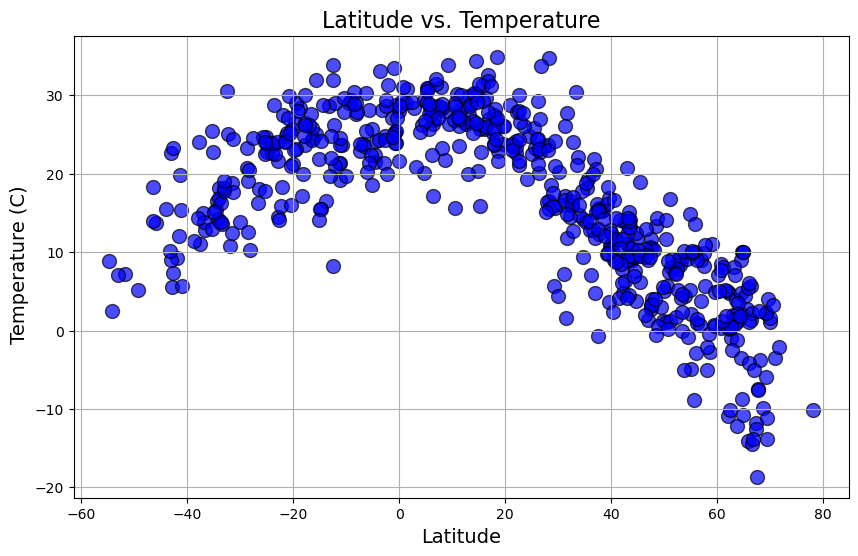

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Latitude'], city_data_df['Max Temp'],
            c='blue',             # marker color
            edgecolor='black',   # marker edge color
            s=100,               # marker size
            alpha=0.7)           # transparency

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel(" Temperature (C)", fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

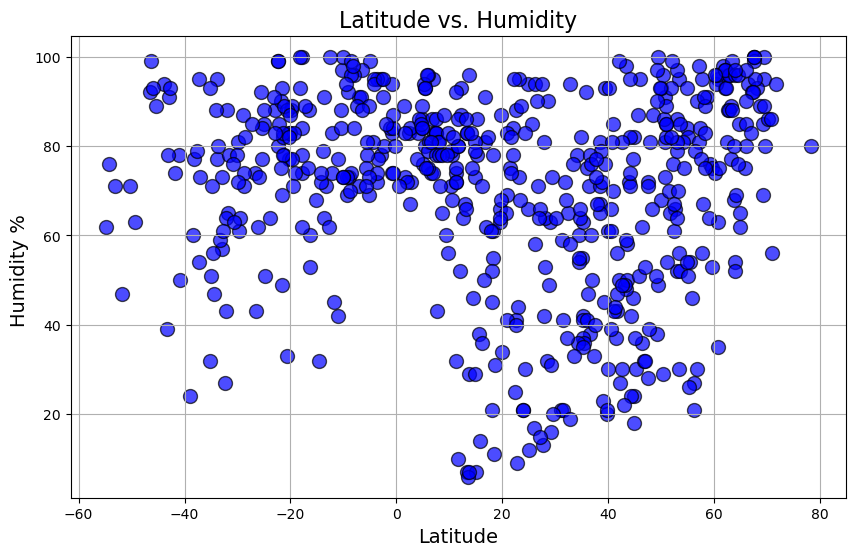

In [8]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Latitude'], city_data_df['Humidity'],
            c='blue',             # marker color
            edgecolor='black',   # marker edge color
            s=100,               # marker size
            alpha=0.7)           # transparency

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity % ", fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

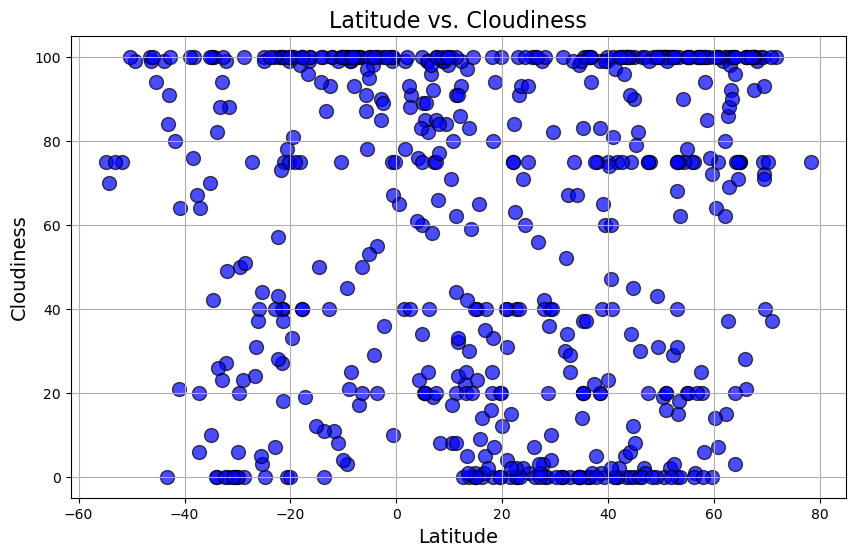

In [9]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Latitude'], city_data_df['Cloudiness'],
            c='blue',             # marker color
            edgecolor='black',   # marker edge color
            s=100,               # marker size
            alpha=0.7)           # transparency

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness", fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

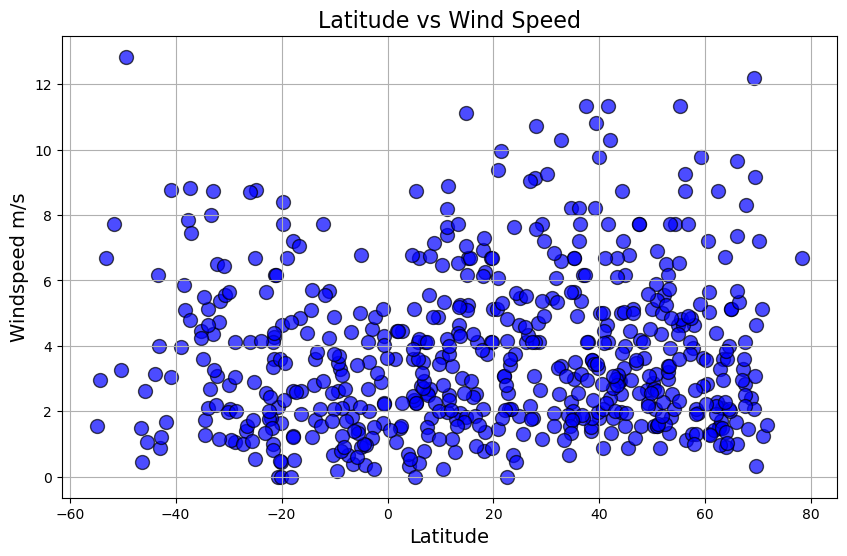

In [10]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Latitude'], city_data_df['Wind Speed'],
            c='blue',             # marker color
            edgecolor='black',   # marker edge color
            s=100,               # marker size
            alpha=0.7)           # transparency

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Windspeed m/s", fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y, title, xlabel, ylabel):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Calculate the regression line
    line = slope * x + intercept
    
    # Create scatter plot
    plt.scatter(x, y)
    plt.plot(x, line, color='red')
    
    # Annotate the plot with the equation and r² value
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}\nr² = {r_value**2:.2f}', 
                 xy=(0.05, 0.95), 
                 xycoords='axes fraction', 
                 fontsize=12, 
                 bbox=dict(facecolor='white', alpha=0.7))
    
    # Show the plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Latitude"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Latitude,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,borogontsy,62.6683,131.1683,-7.96,96,86,1.52,RU,1745008254
2,albany,42.6001,-73.9662,20.36,30,100,1.79,US,1745008255
5,stanley,54.8680,-1.6985,7.51,84,20,4.63,GB,1745008258
6,port-cartier,50.0334,-66.8654,4.74,68,100,2.88,CA,1745008259
7,wailua homesteads,22.0669,-159.3780,23.96,84,75,3.09,US,1745008261


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Latitude"]<=0]

# Display sample data
southern_hemi_df.head()

,City,Latitude,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saldanha,-33.0117,17.9442,19.03,57,94,4.37,ZA,1745008253
3,waitangi,-43.9535,-176.5597,16.01,94,99,3.13,NZ,1745008256
4,grytviken,-54.2811,-36.5092,2.35,76,70,2.97,GS,1745008257
8,papao,-17.7500,-149.5500,28.82,78,100,1.23,PF,1745008262
13,chipinge,-20.1883,32.6236,15.16,77,99,1.64,ZW,1745008268


###  Temperature vs. Latitude Linear Regression Plot

In [15]:
def create_linear_regression_plot(x, y, title, xlabel, ylabel):
    # Calculate linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regress_values = slope * x + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    r_squared = f"r² = {r_value**2:.2f}"

    # Create plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y)
    plt.plot(x, regress_values, color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Annotate equation and R²
    plt.text(x.min() + (x.max()-x.min())*0.05, 
             y.min() + (y.max()-y.min())*0.1, 
             line_eq, fontsize=12, color="red")
    
    plt.text(x.min() + (x.max()-x.min())*0.05, 
             y.min() + (y.max()-y.min())*0.2, 
             r_squared, fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

    plt.grid(True)
    plt.show()

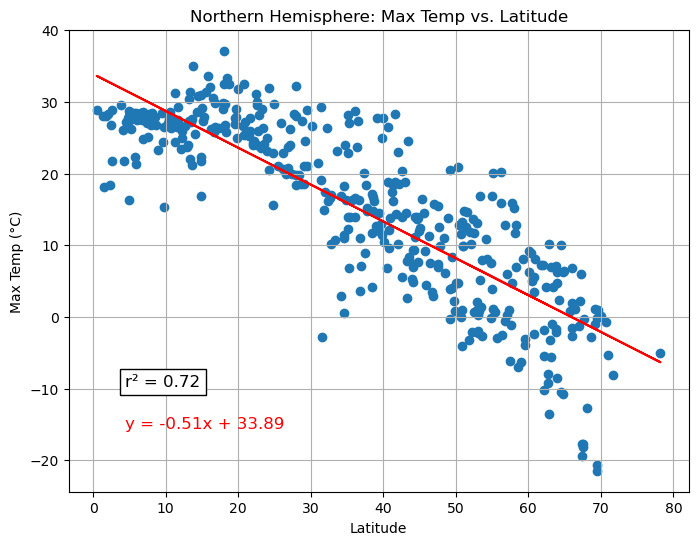

In [16]:


# Linear regression on Northern Hemisphere

create_linear_regression_plot(
    northern_hemi_df['Latitude'],
    northern_hemi_df['Max Temp'],
    'Northern Hemisphere: Max Temp vs. Latitude',
    'Latitude', 'Max Temp (°C)')

In [29]:
#The plot shows a strong negative correlation between latitude and temperature. 
# As latitude increases (moving away from the equator), temperatures tend to decrease. 
# The negative slope and relatively high r² value support this. 
# This is expected since regions farther north receive less solar radiation, especially in winter.

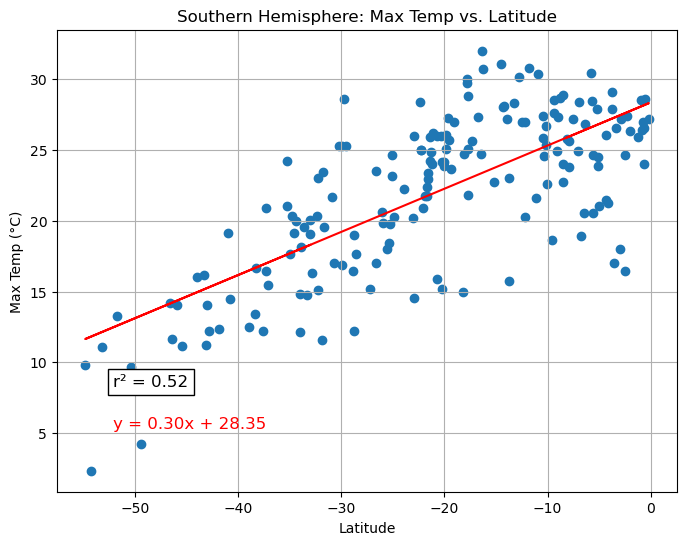

In [17]:
# Temperature vs. Latitude 

# Linear regression on Southern Hemisphere

create_linear_regression_plot(southern_hemi_df['Latitude'], southern_hemi_df['Max Temp'], 
                              'Southern Hemisphere: Max Temp vs. Latitude', 
                              'Latitude', 'Max Temp (°C)')

### Humidity vs. Latitude Linear Regression Plot

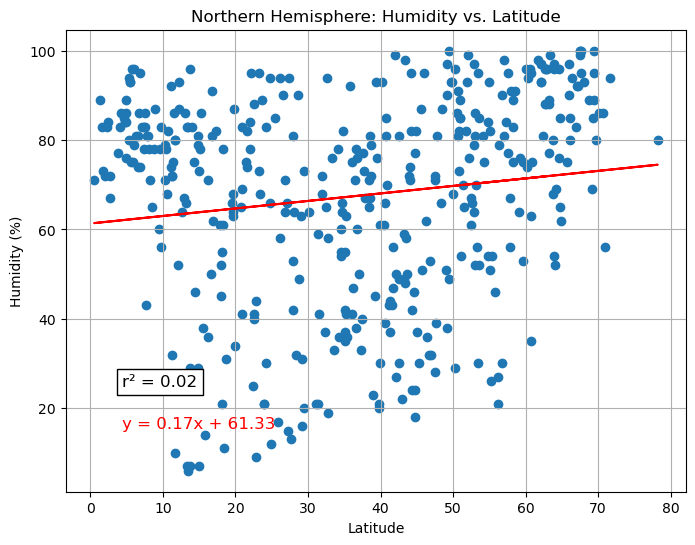

In [18]:
# Humidity vs. Latitude 

# Linear regression on Northern Hemisphere

create_linear_regression_plot(northern_hemi_df['Latitude'], northern_hemi_df['Humidity'], 
                              'Northern Hemisphere: Humidity vs. Latitude', 
                              'Latitude', 'Humidity (%)')

In [ ]:
#The relationship between humidity and latitude in the Northern Hemisphere might be weak or inconsistent. 
# While some patterns may emerge, other environmental and geographic factors (like water bodies and seasonal effects) play a bigger role. 
# A low r² would indicate that latitude is not a strong standalone predictor of humidity.

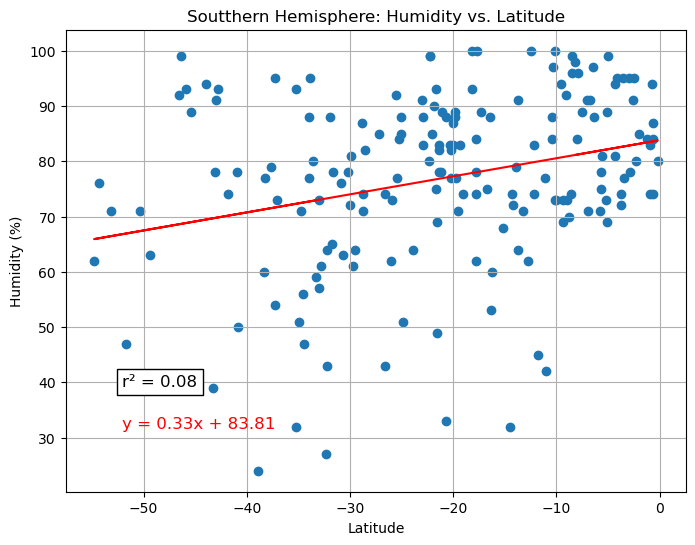

In [19]:
# Humidity vs. Latitude 

# Linear regression on Southern Hemisphere

create_linear_regression_plot(southern_hemi_df['Latitude'], southern_hemi_df['Humidity'], 
                              'Soutthern Hemisphere: Humidity vs. Latitude', 
                              'Latitude', 'Humidity (%)')

### Cloudiness vs. Latitude Linear Regression Plot

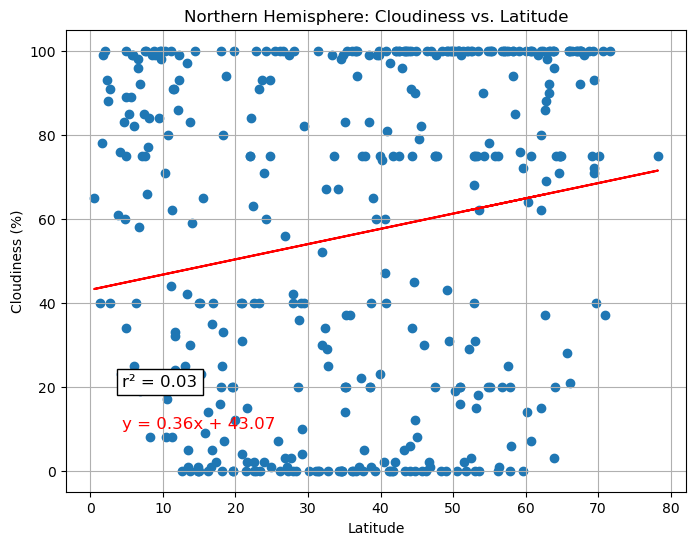

In [20]:
# Cloudiness vs. Latitude 

# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemi_df['Latitude'], northern_hemi_df['Cloudiness'], 
                              'Northern Hemisphere: Cloudiness vs. Latitude', 
                              'Latitude', 'Cloudiness (%)')

In [ ]:
#Cloudiness tends to not have a clear linear trend with latitude in the north. 
# Since cloud coverage is highly dynamic, it’s difficult to model it linearly based on latitude. 
# A scattered plot and low r² are expected here.

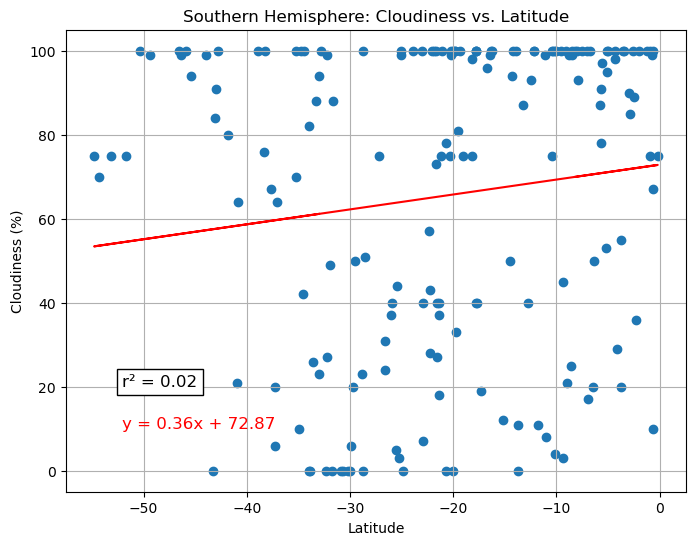

In [21]:
# Cloudiness vs. Latitude 

# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df['Latitude'], southern_hemi_df['Cloudiness'], 
                              'Southern Hemisphere: Cloudiness vs. Latitude', 
                              'Latitude', 'Cloudiness (%)')

### Wind Speed vs. Latitude Linear Regression Plot

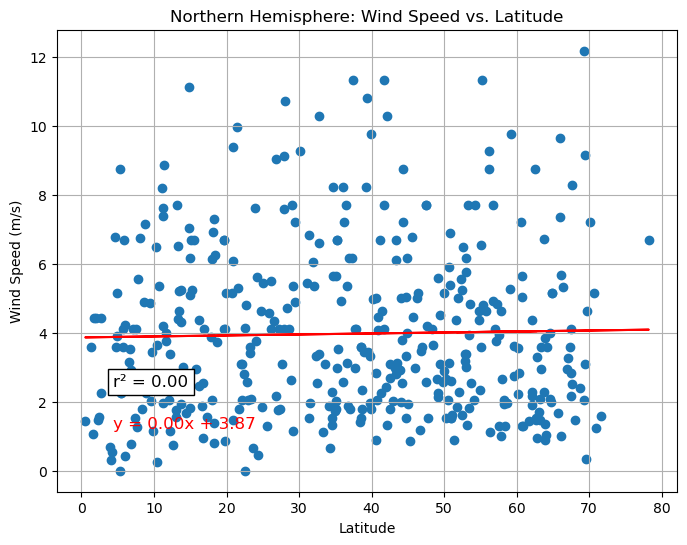

In [22]:
# Wind Speed vs. Latitude 

# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemi_df['Latitude'], northern_hemi_df['Wind Speed'], 
                              'Northern Hemisphere: Wind Speed vs. Latitude', 
                              'Latitude', 'Wind Speed (m/s)')

In [ ]:
#The regression might show a very weak or no clear pattern. 
# Wind speed is controlled by many factors, not just latitude. 
# A low r² value would again suggest that latitude has minimal influence on wind speed.

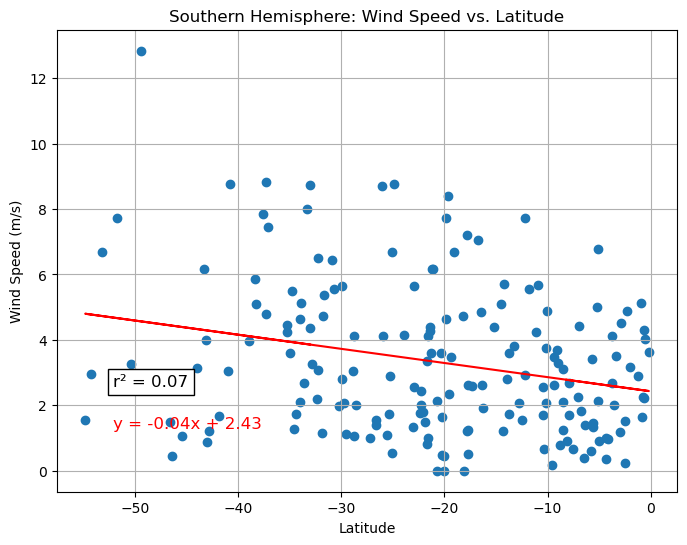

In [23]:
# Wind Speed vs. Latitude 

# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df['Latitude'], southern_hemi_df['Wind Speed'], 
                              'Southern Hemisphere: Wind Speed vs. Latitude', 
                              'Latitude', 'Wind Speed (m/s)')

In [ ]:
#